In [1]:
#!/usr/bin/env python3
# coding=utf-8

"""Analysis of wine data"""

__author__ = "Rachel Wang"

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pygal.maps.world 


In [2]:
# load data from csv file
# set index_col = 0 to avoid adding Unnamed: 0 column when use pd.read_csv
wineData = pd.read_csv("/Users/rwang/PycharmProjects/Kaggle_projects/Wine data analysis/winemag-data_first150k.csv", index_col=0)
# check wineData info and describe
wineData.info()
# explain result: except points and price are numeric, others 
# are objects. country, designation, price, province, region_1
# region_2 have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [3]:
wineData.describe()
# report result: the maximum points is 100, minimum is 80 
# std=3.22 means variance of points is not too much
# the maximum price is 2300, minimum is 4. The std is 36.32
# It is a large value means prices have a big difference.

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [4]:
# check duplicated value
wineData.duplicated().value_counts()

False    97851
True     53079
dtype: int64

In [5]:
duplicateRows = wineData[wineData.duplicated()]
 
#print("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicateRows)

# remove duplicated rows 
wineData.drop_duplicates(inplace=True)


In [6]:
# check basic info. No much change
wineData.info()
wineData.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
country        97848 non-null object
description    97851 non-null object
designation    67955 non-null object
points         97851 non-null int64
price          89131 non-null float64
province       97848 non-null object
region_1       81919 non-null object
region_2       39491 non-null object
variety        97851 non-null object
winery         97851 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


,points,price
count,97851.000000,89131.000000
mean,87.956730,33.658783
std,3.218138,37.670180
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


# analyze hidden info of wine data
# Questions
# 1.

In [7]:
# check distibution of wine production country


Text(0, 0.5, 'Counts')

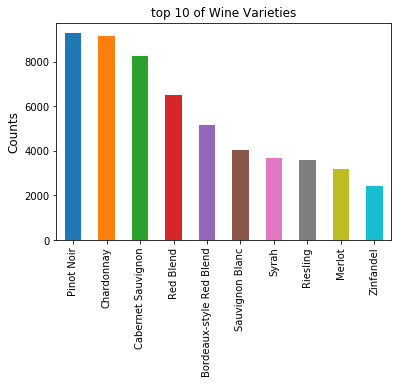

In [8]:
# draw bar chat for varitiy
topVarieties = wineData.variety.value_counts()[0:10]
ax = topVarieties.plot(kind='bar', title='top 10 of Wine Varieties')
plt.ylabel('Counts', fontsize=12)
# the rank is consistent with result of researching "common wine varieties"
# on Google

In [9]:
topVaritiesDf = wineData[wineData.variety.isin(topVarieties.index)]


Plus a note: Difference between bar chat and histogram
A histogram represents the frequency distribution of continuous variables. 
Conversely, a bar graph is a diagrammatic comparison of discrete variables. 
Histogram presents numerical data whereas bar graph shows categorical data. 
The histogram is drawn in such a way that there is no gap between the bars.

[Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Sauvignon Blanc'),
 Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Syrah'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Riesling'),
 Text(0, 0, 'Zinfandel'),
 Text(0, 0, 'Bordeaux-style Red Blend'),
 Text(0, 0, 'Merlot')]

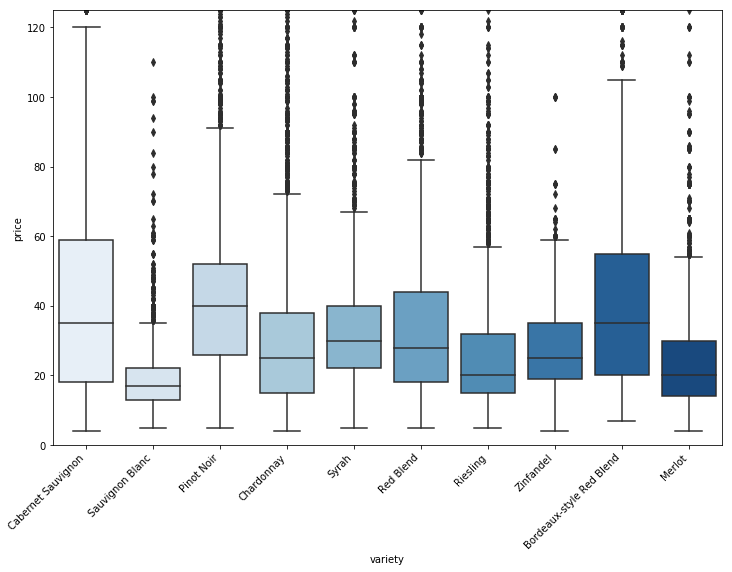

In [10]:
plt.figure(figsize=(12, 8))
plt.ylim([0, 125])
ax = sns.boxplot(x='variety', y="price", data=topVaritiesDf, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Bordeaux-style Red Blend, Pinot Noir, and Cabernet Sauvignon have higher price
among the top10 varieties. Let's see top10 wine variety and points relationship

[Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Sauvignon Blanc'),
 Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Syrah'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Riesling'),
 Text(0, 0, 'Zinfandel'),
 Text(0, 0, 'Bordeaux-style Red Blend'),
 Text(0, 0, 'Merlot')]

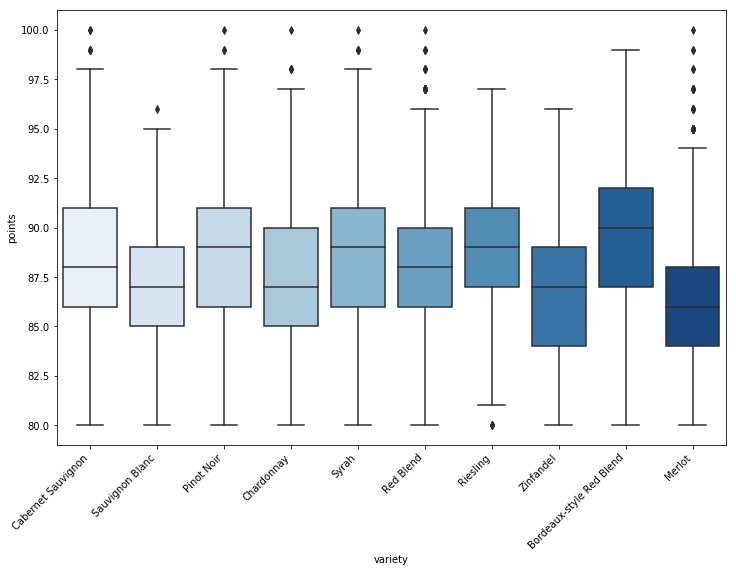

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='variety', y="points", data=topVaritiesDf, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Still Bordeaux-style Red Blend, Pinot Noir, and Cabernet Sauvignon 
have higher mean of points
We could get a conclusion: more expensive, taste better.

In [17]:
wineData.country.value_counts().index

Index(['US', 'Italy', 'France', 'Spain', 'Chile', 'Portugal', 'Argentina',
       'Australia', 'Austria', 'New Zealand', 'Germany', 'South Africa',
       'Greece', 'Israel', 'Canada', 'Hungary', 'Romania', 'Slovenia',
       'Croatia', 'Bulgaria', 'Mexico', 'Uruguay', 'Moldova', 'Turkey',
       'Georgia', 'Lebanon', 'Cyprus', 'Brazil', 'Macedonia', 'Morocco',
       'Serbia', 'England', 'India', 'Czech Republic', 'Ukraine', 'Lithuania',
       'Switzerland', 'Bosnia and Herzegovina', 'Luxembourg', 'Egypt',
       'South Korea', 'China', 'Slovakia', 'Tunisia', 'Albania', 'Japan',
       'Montenegro', 'US-France'],
      dtype='object')

In [ ]:
countryCode = {'Andorra':'ad', 'United Arab Emirates':'ae', 'Afghanistan':'af',
              'Albania':'al','Armenia':'am', 'Angola':'ao', 'Antarctica':'aq', 
               'Argentina':'ar', 'Austria':'at','Australia':'au', 'Azerbaijan':'az', 
               
               'Bosnia and Herzegovina':'ba',
               'Bangladesh':'bd', 'Belgium':'be','Burkina Faso':'bf', 'Bulgaria':'bg', 
               'Bahrain':'bh', 'Burundi':'bi','Benin':'bj', 'Brunei Darussalam':'bn',
               'Bolivia, Plurinational State of':'bo', 'Brazil':'br','Bhutan':'bt', 
               'Botswana':'bw', 'Belarus':'by','Belize':'bz', 
               
               'Canada':'ca', 'Congo, the Democratic Republic of the':'cd',
               'Central African Republic':'cf', 'Congo':'cg','Switzerland':'ch', 
               'Cote d’Ivoire':'ci', 'Chile':'cl','Cameroon':'cm', 'China':'cn',
               'Colombia':'co','Costa Rica':'cr', 'Cuba':'cu', 
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              }

In [12]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Wine distibution'

In [15]:
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render_to_file('map.svg')